In [1]:
import sys
sys.path.append('../')
from maskmoment import maskmoment
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def quadplot(basename, extmask=None):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))
    mom0 = fits.getdata(basename+'.mom0.fits.gz')
    ax1.imshow(mom0,origin='lower',cmap='CMRmap')
    ax1.set_title(basename+' - Moment 0',fontsize='x-large')
    mom1 = fits.getdata(basename+'.mom1.fits.gz')
    ax2.imshow(mom1,origin='lower',cmap='jet')
    ax2.set_title(basename+' - Moment 1',fontsize='x-large')
    mom2 = fits.getdata(basename+'.mom2.fits.gz')
    ax3.imshow(mom2,origin='lower',cmap='CMRmap')
    ax3.set_title(basename+' - Moment 2',fontsize='x-large')
    if extmask is None:
        mask = np.sum(fits.getdata(basename+'.mask.fits.gz'),axis=0)
    else:
        mask = np.sum(fits.getdata(extmask),axis=0)
    ax4.imshow(mask,origin='lower',cmap='CMRmap_r')
    ax4.set_title('Projected Mask',fontsize='x-large')
    plt.subplots_adjust(hspace=0.15,wspace=0.15)
    plt.show()
    return

## Example 0: Dilated mask with no smoothing.  Expand from 4$\sigma$ to 2$\sigma$ contour.  Mask regions must span at least 2 beam areas and 2 channels at any pixel.

In [3]:
maskmoment(img_fits='NGC4047.co.smo7msk.fits.gz', 
           gain_fits='NGC4047.co.smo7gain.fits.gz',
           snr_hi=4, snr_lo=2, minbeam=2, min_tot_ch=2, min_tot_all=True,
           outname='NGC4047.dilmsk')


Output basename is: NGC4047.dilmsk
Image cube NGC4047.co.smo7msk.fits.gz:
 SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s
Gain cube NGC4047.co.smo7gain.fits.gz:
 SpectralCube with shape=(44, 128, 128):
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s
Found rms value of 0.01 Jy / beam
Noise cube:
 SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:  

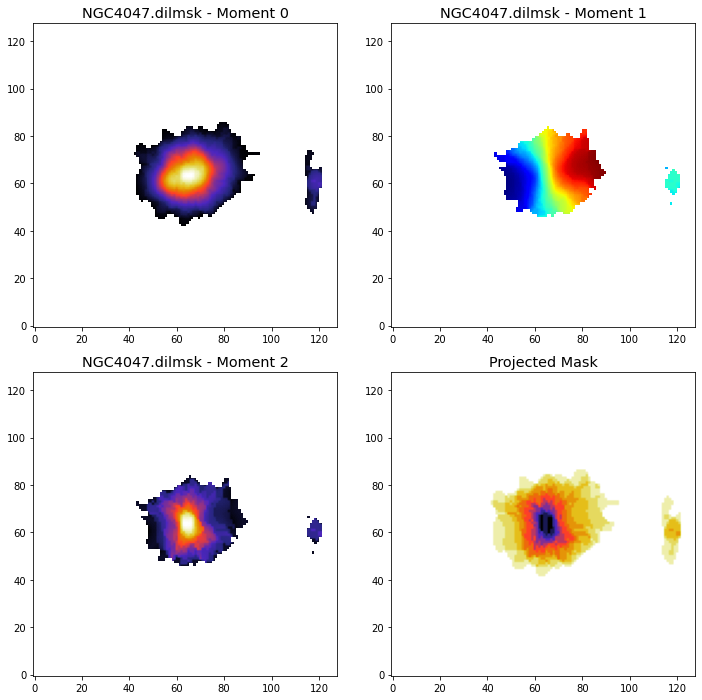

In [4]:
quadplot('NGC4047.dilmsk')

## Example 1: Dilated mask with 2 pixel padding in spatial dimensions.  Start at 5$\sigma$ contour to isolate main galaxy.  We speed up execution by using the rms cube generated by Example 0.

In [5]:
maskmoment(img_fits='NGC4047.co.smo7msk.fits.gz', 
           rms_fits='NGC4047.dilmsk.ecube.fits.gz',
           snr_hi=5, snr_lo=2, minbeam=2, nguard=[2,0],
           outname='NGC4047.dilmskpad')


Output basename is: NGC4047.dilmskpad
Image cube NGC4047.co.smo7msk.fits.gz:
 SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s
Noise cube NGC4047.dilmsk.ecube.fits.gz:
 SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s

SNR cube:
 SpectralCube with shape=(44, 128, 128):
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 d

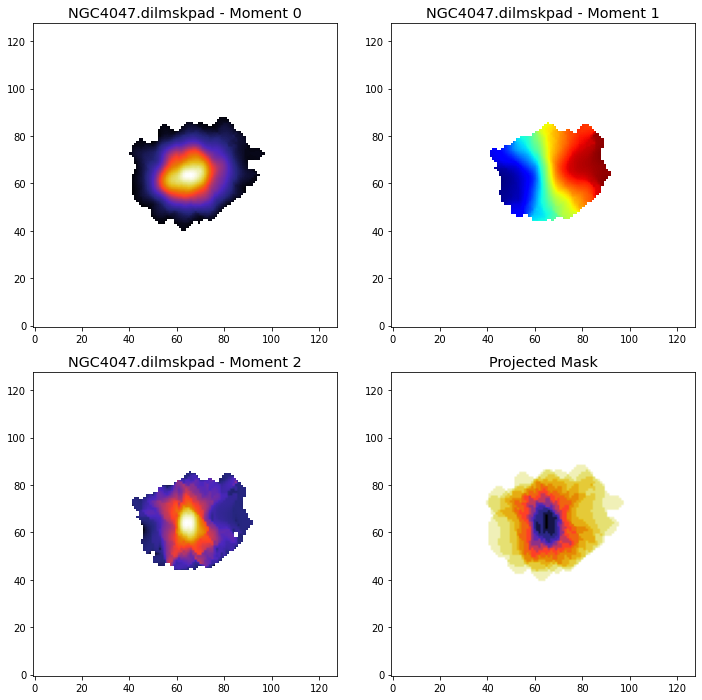

In [6]:
quadplot('NGC4047.dilmskpad')

## Example 2: Smooth and mask method.  Generate a mask using the 3$\sigma$ contour of a smoothed (to 10") cube.  Mask regions must span at least 2 beam areas. 

In [7]:
maskmoment(img_fits='NGC4047.co.smo7msk.fits.gz', 
           rms_fits='NGC4047.dilmsk.ecube.fits.gz',
           snr_hi=3, snr_lo=3, fwhm=10, vsm=None, minbeam=2,
           outname='NGC4047.smomsk')


Output basename is: NGC4047.smomsk
Image cube NGC4047.co.smo7msk.fits.gz:
 SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s
Noise cube NGC4047.dilmsk.ecube.fits.gz:
 SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s

SNR cube:
 SpectralCube with shape=(44, 128, 128):
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg


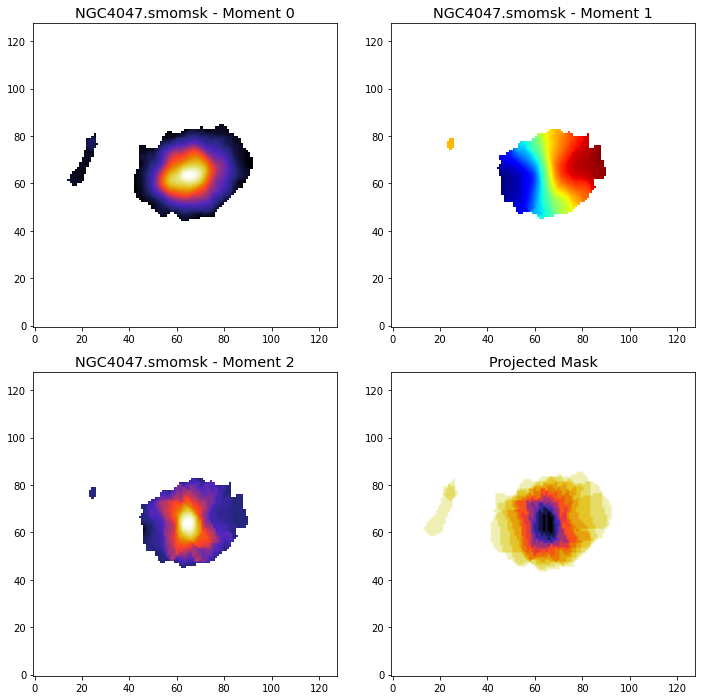

In [8]:
quadplot('NGC4047.smomsk')

## Example 3: Dilated smooth-and-mask.  Expand from the 4$\sigma$ to 2$\sigma$ contour of the smoothed cube. 

In [9]:
maskmoment(img_fits='NGC4047.co.smo7msk.fits.gz', 
           rms_fits='NGC4047.dilmsk.ecube.fits.gz',
           snr_hi=4, snr_lo=2, fwhm=10, vsm=None, minbeam=2,
           outname='NGC4047.dilsmomsk', output_2d_mask=True)


Output basename is: NGC4047.dilsmomsk
Image cube NGC4047.co.smo7msk.fits.gz:
 SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s
Noise cube NGC4047.dilmsk.ecube.fits.gz:
 SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s

SNR cube:
 SpectralCube with shape=(44, 128, 128):
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 d

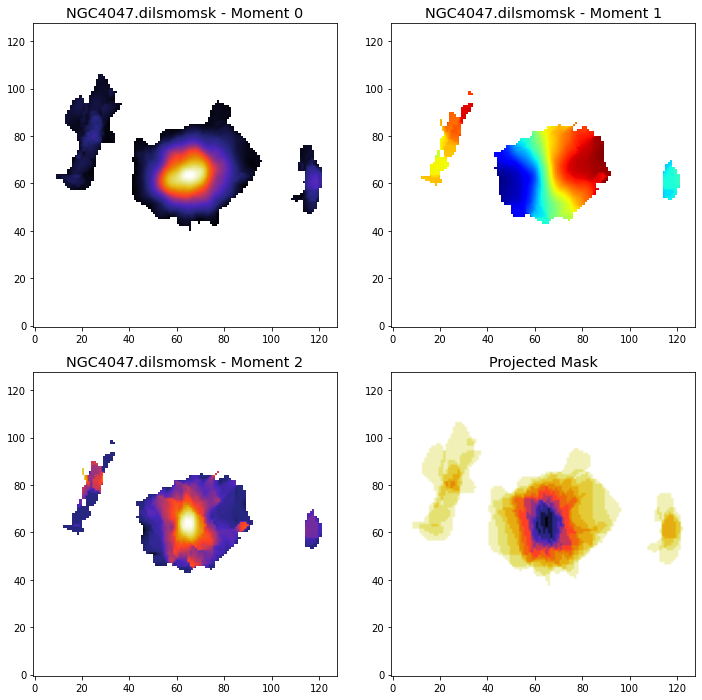

In [10]:
quadplot('NGC4047.dilsmomsk')

## Example 4: Apply an existing mask.  Here we apply the 2D version of the mask derived in Example 3.  Since this includes a lot of noise the results are not as good.

In [11]:
maskmoment(img_fits='NGC4047.co.smo7msk.fits.gz', 
           rms_fits='NGC4047.dilmsk.ecube.fits.gz',
           mask_fits='NGC4047.dilsmomsk.mask2d.fits.gz',
           outname='NGC4047.msk2d')


Output basename is: NGC4047.msk2d
Image cube NGC4047.co.smo7msk.fits.gz:
 SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s
Noise cube NGC4047.dilmsk.ecube.fits.gz:
 SpectralCube with shape=(44, 128, 128) and unit=Jy / beam:
 n_x:    128  type_x: RA---SIN  unit_x: deg    range:   180.684759 deg:  180.738161 deg
 n_y:    128  type_y: DEC--SIN  unit_y: deg    range:    48.618414 deg:   48.653691 deg
 n_s:     44  type_s: VRAD      unit_s: m / s  range:  2980000.000 m / s: 3840000.000 m / s
Units of cube are Jy / beam
Units of mom0 map are K km / s
Wrote ./NGC4047.msk2d.mom0.fits.gz
Wrote ./NGC4047.msk2d.mom1.fits.gz
Wrote ./NGC4047.msk2d.mom2.fits.gz
Wrote ./NGC4047.msk2d.emom0.fits.gz
Wrote ./NGC4047.msk2d.emom1.f

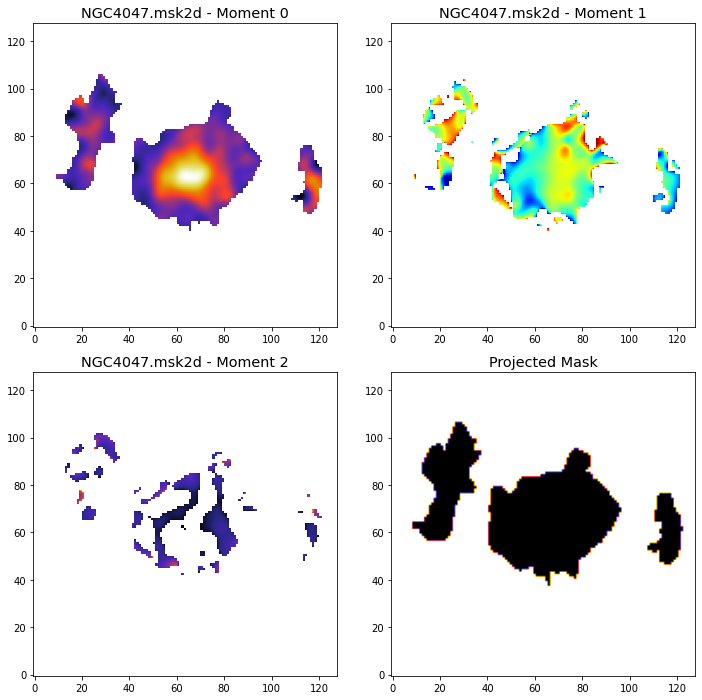

In [12]:
quadplot('NGC4047.msk2d', extmask='NGC4047.dilsmomsk.mask2d.fits.gz')

## Compare integrated spectra from the 5 masks.

Text(0, 0.5, 'Flux after masking [Jy]')

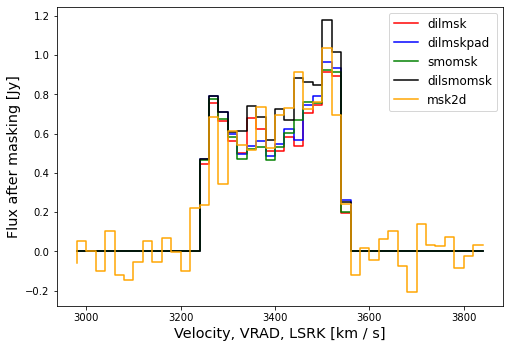

In [13]:
ex0 = Table.read('NGC4047.dilmsk.flux.csv', format='ascii.ecsv')
ex1 = Table.read('NGC4047.dilmskpad.flux.csv', format='ascii.ecsv')
ex2 = Table.read('NGC4047.smomsk.flux.csv', format='ascii.ecsv')
ex3 = Table.read('NGC4047.dilsmomsk.flux.csv', format='ascii.ecsv')
ex4 = Table.read('NGC4047.msk2d.flux.csv', format='ascii.ecsv')
fig = plt.figure(figsize=[8,5.5])
plt.step(ex0['Velocity'],ex0['Flux'],color='r',label='dilmsk')
plt.step(ex1['Velocity'],ex1['Flux'],color='b',label='dilmskpad')
plt.step(ex2['Velocity'],ex2['Flux'],color='g',label='smomsk')
plt.step(ex3['Velocity'],ex3['Flux'],color='k',label='dilsmomsk')
plt.step(ex4['Velocity'],ex4['Flux'],color='orange',label='msk2d')
plt.legend(fontsize='large')
plt.xlabel(ex0['Velocity'].description+' ['+str(ex0['Velocity'].unit)+']',fontsize='x-large')
plt.ylabel(ex0['Flux'].description+' ['+str(ex0['Flux'].unit)+']',fontsize='x-large')